In [1]:
from zipfile import ZipFile

with open("archive55.zip", "rb") as f:
    zip = ZipFile(f)
    zip.extractall()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
df=pd.read_csv("onlinefraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


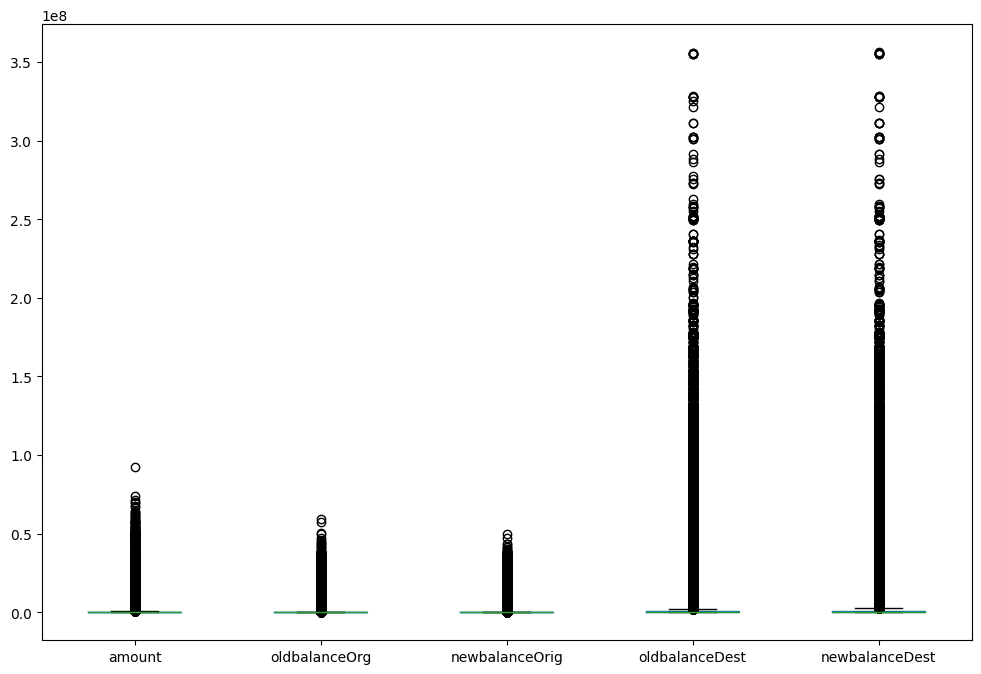

In [8]:
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
def plot_boxplot(df, numeric_cols):
    plt.figure(figsize=(12, 8))
    df.boxplot(column=numeric_cols)
    plt.grid(False)
    plt.show()


plot_boxplot(df, numeric_cols)


In [9]:

# Define a function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Filter out values that are outliers
    df_no_outliers = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]

    return df_no_outliers

# Remove outliers from oldbalanceDest and newbalanceDest
df_cleaned = remove_outliers(df, 'oldbalanceDest')
df_cleaned = remove_outliers(df_cleaned, 'newbalanceDest')

# Display the cleaned dataset
df_cleaned.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
df_cleaned.duplicated().sum()

np.int64(0)

In [11]:
# the values in the type column
df_cleaned.type.value_counts()

type
PAYMENT     2151495
CASH_OUT    1630999
CASH_IN     1070420
TRANSFER     252211
DEBIT         32023
Name: count, dtype: int64

In [12]:
# the values in the type column
df_cleaned.type.value_counts()

type
PAYMENT     2151495
CASH_OUT    1630999
CASH_IN     1070420
TRANSFER     252211
DEBIT         32023
Name: count, dtype: int64

In [13]:
# Ensure numeric columns are float or int, and categorical columns are object type
df_cleaned['amount'] = df_cleaned['amount'].astype(float)
df_cleaned['oldbalanceOrg'] = df_cleaned['oldbalanceOrg'].astype(float)
df_cleaned['newbalanceOrig'] = df_cleaned['newbalanceOrig'].astype(float)
df_cleaned['oldbalanceDest'] = df_cleaned['oldbalanceDest'].astype(float)
df_cleaned['newbalanceDest'] = df_cleaned['newbalanceDest'].astype(float)

In [14]:
# Import the necessary library
import plotly.express as px
type = df['type'].value_counts()

transaction = type.index
quality = type.values
figure = px.pie(df_cleaned, values=quality,hole=0.5, names=transaction, title="type of transaction")
figure.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

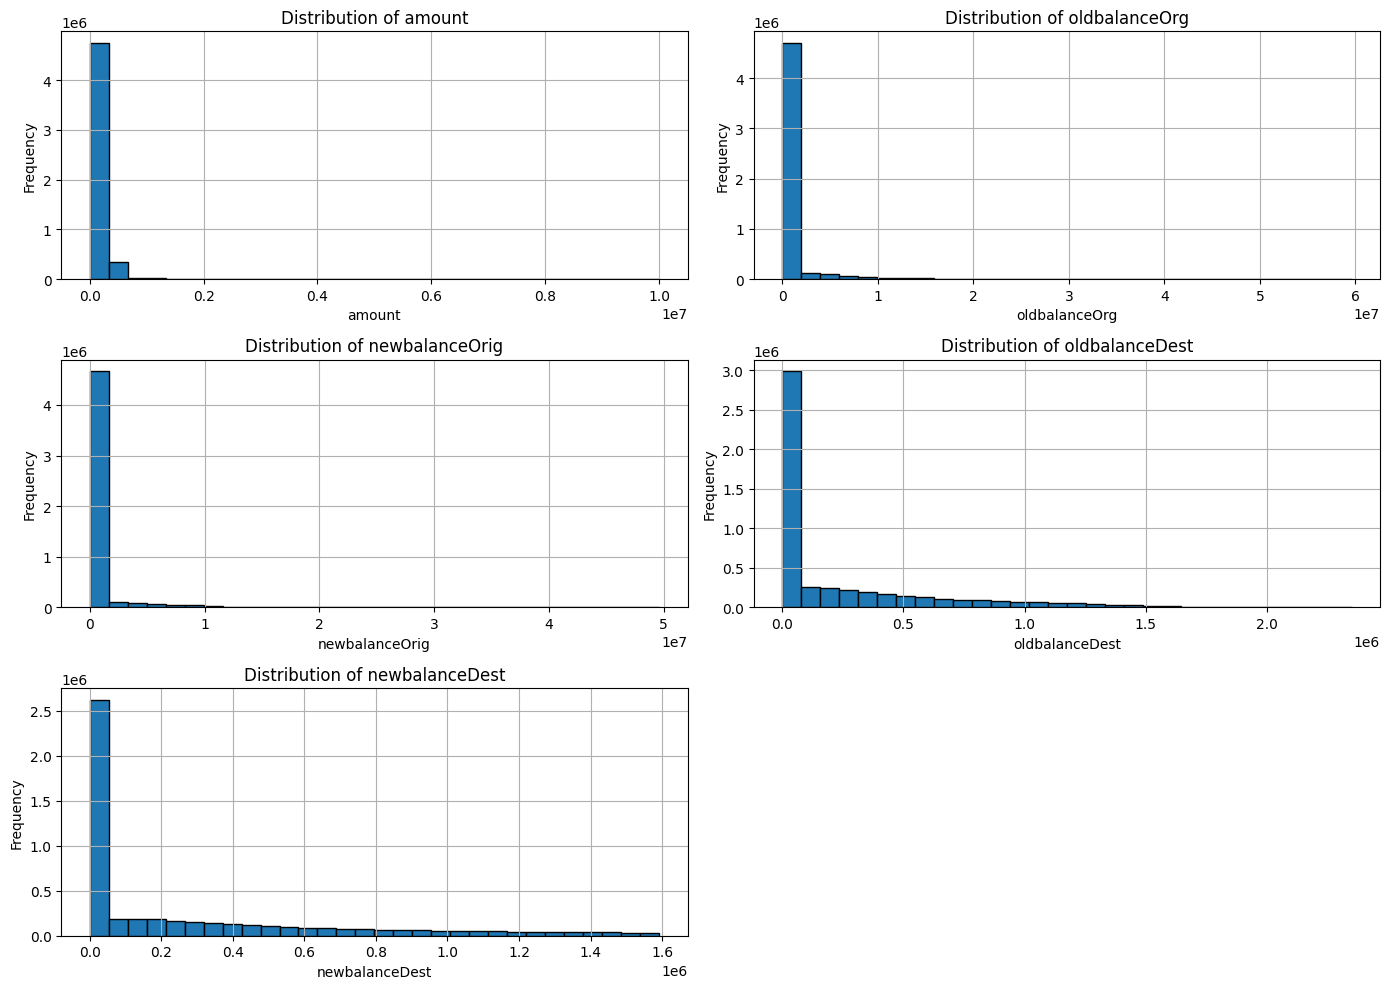

In [14]:
def plot_histograms(df, numeric_cols):
    plt.figure(figsize=(14, 10))
    for i, column in enumerate(numeric_cols):
        plt.subplot(3, 2, i + 1)
        df[column].hist(bins=30, edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
plot_histograms(df_cleaned, numeric_cols)


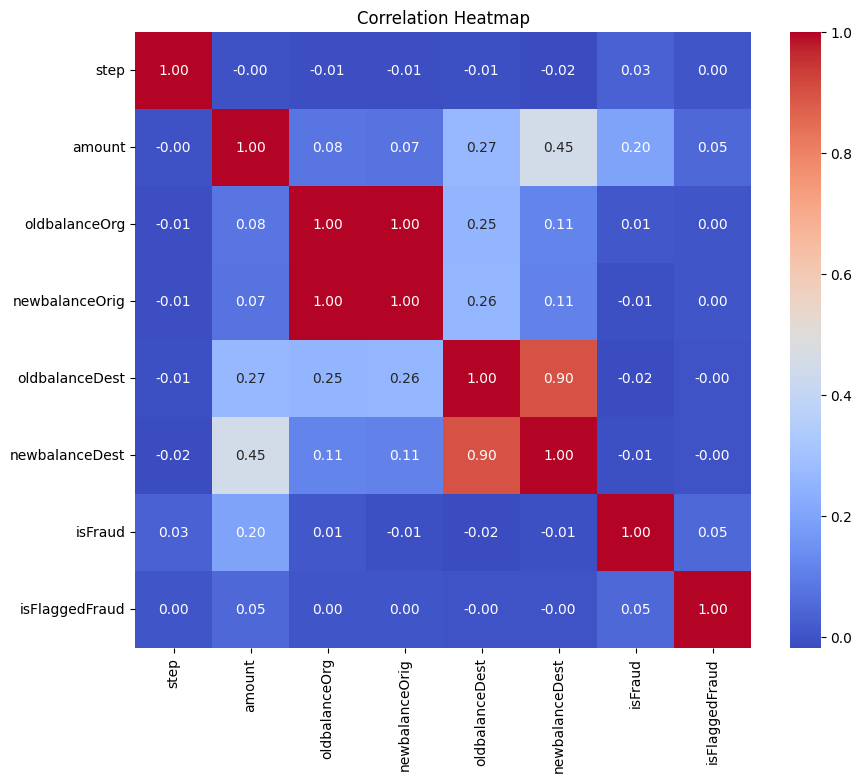

In [15]:
import seaborn as sns
def plot_correlation_heatmap(df_cleaned):
    plt.figure(figsize=(10, 8))

    correlation_matrix = df_cleaned.corr(numeric_only=True)

    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(df_cleaned)

In [19]:
# Feature Engineering: Balance Difference
df_cleaned['balance_diff_org'] = df_cleaned['oldbalanceOrg'] - df_cleaned['newbalanceOrig']
df_cleaned['balance_diff_dest'] = df_cleaned['oldbalanceDest'] - df_cleaned['newbalanceDest']

# Encoding 'type' feature
df_cleaned = pd.get_dummies(df_cleaned, columns=['type'], drop_first=True)


In [20]:
features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'balance_diff_org', 'balance_diff_dest']

X = np.array(df_cleaned[features])
y = np.array(df_cleaned['isFraud'])

In [21]:
df_cleaned.isFraud.value_counts()

isFraud
0    5130579
1       6569
Name: count, dtype: int64

In [22]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_sm, y_sm =smote.fit_resample(X,y)

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.20,random_state=42)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [25]:
model = DecisionTreeClassifier(random_state=42)
# Train models
model.fit(X_train, y_train)

# Make predictions
y_pred_dt = model.predict(X_test)


In [26]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
# Classification reports for detailed performance metrics
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.999355336043878

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1026720
           1       1.00      1.00      1.00   1025512

    accuracy                           1.00   2052232
   macro avg       1.00      1.00      1.00   2052232
weighted avg       1.00      1.00      1.00   2052232



In [30]:
import pickle

In [31]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


Decision Tree ROC-AUC: 0.9993554083867658


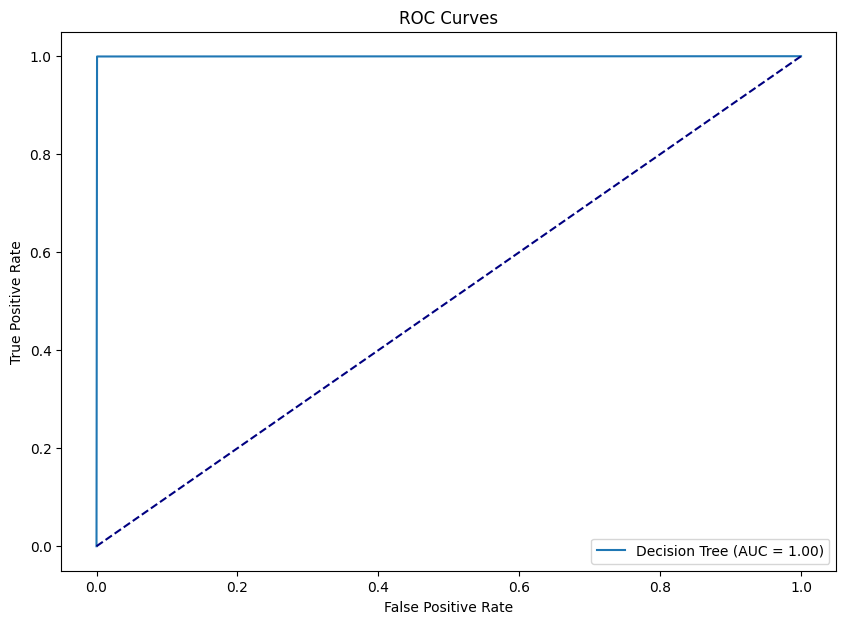

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve
# Calculate ROC-AUC for each model
dt_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"Decision Tree ROC-AUC: {dt_roc_auc}")


# Plot ROC Curves
plt.figure(figsize=(10, 7))
fpr_dt, tpr_dt, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {dt_roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

In [28]:
df_cleaned.to_csv("cleaned_df.csv")

In [29]:
df=pd.read_csv("cleaned_df.csv")
df.head()

,Unnamed: 0,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff_org,balance_diff_dest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0,False,False,True,False
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0,False,False,True,False
2,2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0,False,False,False,True
3,3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0,True,False,False,False
4,4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0,False,False,True,False
